In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from datetime import datetime

df = pd.read_csv('/Users/ericdenbin/Documents/flatiron_ds/2_phase/2_project/dsc-phase-2-project/data/kc_house_data.csv')
                 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df['basement'] = df['sqft_living'] - df['sqft_above']

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,291.725008
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,442.667800
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000


In [7]:
df.shape

(21597, 22)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


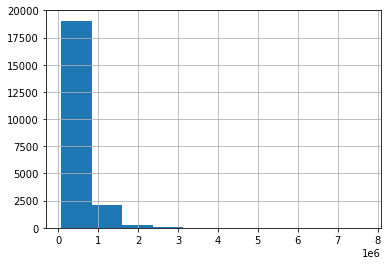

In [9]:
df['price'].hist();

In [10]:
# 'View' is an ambiguous feature 
#'zipcode' is categorical data that would created 70 new columns if we created dummies
# 'yr_renovated' is ambiguous as well 
#'sqft_basement' is an odd datatype, and is a portion of sqft_living, and thus multicollinear.
 
df.drop(axis=1, columns=['view', 'zipcode', 'yr_renovated','sqft_basement'], inplace=True)

In [11]:
#df['year'] = df['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").year)

In [12]:
df['yrs_old'] = 2021 - df['yr_built']

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1788.596842,1970.999676,47.560093,-122.213982,1986.620318,12758.283512,291.725008,50.000324
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,827.759761,29.375234,0.138552,0.140724,685.230472,27274.441950,442.667800,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,6.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,24.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,46.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000,70.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,121.000000


In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,1955,47.5112,-122.257,1340,5650,0,66
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,47.7210,-122.319,1690,7639,400,70
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,47.7379,-122.233,2720,8062,0,88
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,47.5208,-122.393,1360,5000,910,56
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,47.6168,-122.045,1800,7503,0,34


In [15]:
df.drop(axis=1,columns=['yr_built', 'id'], inplace=True)

In [16]:
df = df[df['bedrooms'] < 33]

In [17]:
df.dropna(inplace=True)
df.shape

(19220, 17)

In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,47.7210,-122.319,1690,7639,400,70
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,47.7379,-122.233,2720,8062,0,88
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,47.5208,-122.393,1360,5000,910,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,47.6168,-122.045,1800,7503,0,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,47.6561,-122.005,4760,101930,1530,20


In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
count,1.922000e+04,19220.000000,19220.000000,19220.000000,1.922000e+04,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,5.416347e+05,3.373101,2.117092,2082.444953,1.507423e+04,1.495057,0.007596,3.409886,7.661082,1791.405151,47.559917,-122.214036,1987.410146,12807.113892,291.039802,49.958949
std,3.722568e+05,0.903638,0.769592,922.562829,4.081830e+04,0.540158,0.086827,0.650196,1.176019,831.731558,0.138693,0.140729,684.725375,27577.497800,442.947010,29.384919
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.470675,-122.328000,1490.000000,5100.000000,0.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000,0.000000,46.000000
75%,6.441250e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.678000,-122.125000,2360.000000,10092.000000,560.000000,70.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,121.000000


In [20]:
df.shape


(19220, 17)

In [21]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
price,1.000000,0.317742,0.527360,0.704665,0.087008,0.258295,0.276297,0.038010,0.667238,0.609194,0.305120,0.021402,0.582195,0.081248,0.323768,-0.053537
bedrooms,0.317742,1.000000,0.531243,0.595019,0.030598,0.188995,-0.002303,0.021583,0.370907,0.495401,-0.012568,0.136691,0.405599,0.029003,0.309071,-0.163255
bathrooms,0.527360,0.531243,1.000000,0.756338,0.085089,0.506205,0.067281,-0.126387,0.666886,0.688036,0.025958,0.223551,0.570054,0.085885,0.283347,-0.507005
sqft_living,0.704665,0.595019,0.756338,1.000000,0.173340,0.357170,0.110228,-0.057412,0.764050,0.877528,0.053965,0.239161,0.755645,0.182743,0.435030,-0.317429
sqft_lot,0.087008,0.030598,0.085089,0.173340,1.000000,-0.007257,0.023142,-0.014087,0.114572,0.184222,-0.085780,0.229984,0.146230,0.723060,0.015112,-0.055864
floors,0.258295,0.188995,0.506205,0.357170,-0.007257,1.000000,0.021879,-0.263421,0.458104,0.525580,0.051391,0.127809,0.280888,-0.011008,-0.242985,-0.490232
waterfront,0.276297,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.017656,0.087381,0.075460,-0.012768,-0.039869,0.088858,0.032000,0.087888,0.026083
condition,0.038010,0.021583,-0.126387,-0.057412,-0.014087,-0.263421,0.017656,1.000000,-0.144465,-0.155928,-0.018427,-0.105415,-0.092595,-0.005384,0.173213,0.361943
grade,0.667238,0.370907,0.666886,0.764050,0.114572,0.458104,0.087381,-0.144465,1.000000,0.757458,0.115629,0.198533,0.714039,0.120191,0.169055,-0.446286
sqft_above,0.609194,0.495401,0.688036,0.877528,0.184222,0.525580,0.075460,-0.155928,0.757458,1.000000,0.003079,0.342380,0.733072,0.192284,-0.050022,-0.421809


In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,47.7210,-122.319,1690,7639,400,70
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,47.7379,-122.233,2720,8062,0,88
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,47.5208,-122.393,1360,5000,910,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,47.6168,-122.045,1800,7503,0,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,47.6561,-122.005,4760,101930,1530,20


In [23]:
df.shape

(19220, 17)

In [24]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
count,1.922000e+04,19220.000000,19220.000000,19220.000000,1.922000e+04,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,5.416347e+05,3.373101,2.117092,2082.444953,1.507423e+04,1.495057,0.007596,3.409886,7.661082,1791.405151,47.559917,-122.214036,1987.410146,12807.113892,291.039802,49.958949
std,3.722568e+05,0.903638,0.769592,922.562829,4.081830e+04,0.540158,0.086827,0.650196,1.176019,831.731558,0.138693,0.140729,684.725375,27577.497800,442.947010,29.384919
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.470675,-122.328000,1490.000000,5100.000000,0.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000,0.000000,46.000000
75%,6.441250e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.678000,-122.125000,2360.000000,10092.000000,560.000000,70.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,121.000000


In [25]:
df.shape

(19220, 17)

In [26]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
count,1.922000e+04,19220.000000,19220.000000,19220.000000,1.922000e+04,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,5.416347e+05,3.373101,2.117092,2082.444953,1.507423e+04,1.495057,0.007596,3.409886,7.661082,1791.405151,47.559917,-122.214036,1987.410146,12807.113892,291.039802,49.958949
std,3.722568e+05,0.903638,0.769592,922.562829,4.081830e+04,0.540158,0.086827,0.650196,1.176019,831.731558,0.138693,0.140729,684.725375,27577.497800,442.947010,29.384919
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.470675,-122.328000,1490.000000,5100.000000,0.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000,0.000000,46.000000
75%,6.441250e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.678000,-122.125000,2360.000000,10092.000000,560.000000,70.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,121.000000


In [27]:
non_normal = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'sqft_lot15', 'sqft_living15', 'yrs_old']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))


In [28]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
price,1.000000,0.344735,0.520476,0.674960,0.137762,0.313838,0.180529,0.039044,0.704877,0.588272,0.451025,0.051586,0.604748,0.123328,0.314671,-0.135349
bedrooms,0.344735,1.000000,0.538827,0.651655,0.193820,0.197116,-0.008977,0.024431,0.386229,0.550527,-0.028543,0.157197,0.427112,0.173220,0.284518,-0.171497
bathrooms,0.520476,0.538827,1.000000,0.761185,0.083281,0.504438,0.049891,-0.113616,0.644582,0.684446,0.012809,0.241170,0.570003,0.077965,0.267628,-0.533933
sqft_living,0.674960,0.651655,0.761185,1.000000,0.324572,0.371877,0.083379,-0.048827,0.744731,0.865973,0.040251,0.257097,0.745893,0.301238,0.421704,-0.340679
sqft_lot,0.137762,0.193820,0.083281,0.324572,1.000000,-0.235930,0.076465,0.072463,0.185159,0.318011,-0.149025,0.376354,0.365504,0.917893,0.093671,0.143233
floors,0.313838,0.197116,0.504438,0.371877,-0.235930,1.000000,0.021879,-0.263421,0.458104,0.549927,0.051487,0.127809,0.276601,-0.225569,-0.242985,-0.592396
waterfront,0.180529,-0.008977,0.049891,0.083379,0.076465,0.021879,1.000000,0.017656,0.087381,0.062297,-0.012719,-0.039869,0.081090,0.086162,0.087888,0.028914
condition,0.039044,0.024431,-0.113616,-0.048827,0.072463,-0.263421,0.017656,1.000000,-0.144465,-0.148038,-0.018439,-0.105415,-0.089886,0.079953,0.173213,0.388353
grade,0.704877,0.386229,0.644582,0.744731,0.185159,0.458104,0.087381,-0.144465,1.000000,0.744176,0.115742,0.198533,0.688798,0.185816,0.169055,-0.446550
sqft_above,0.588272,0.550527,0.684446,0.865973,0.318011,0.549927,0.062297,-0.148038,0.744176,1.000000,-0.015082,0.361155,0.713194,0.297382,-0.050509,-0.455160


In [29]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
price,1.000000,0.344735,0.520476,0.674960,0.137762,0.313838,0.180529,0.039044,0.704877,0.588272,0.451025,0.051586,0.604748,0.123328,0.314671,-0.135349
bedrooms,0.344735,1.000000,0.538827,0.651655,0.193820,0.197116,-0.008977,0.024431,0.386229,0.550527,-0.028543,0.157197,0.427112,0.173220,0.284518,-0.171497
bathrooms,0.520476,0.538827,1.000000,0.761185,0.083281,0.504438,0.049891,-0.113616,0.644582,0.684446,0.012809,0.241170,0.570003,0.077965,0.267628,-0.533933
sqft_living,0.674960,0.651655,0.761185,1.000000,0.324572,0.371877,0.083379,-0.048827,0.744731,0.865973,0.040251,0.257097,0.745893,0.301238,0.421704,-0.340679
sqft_lot,0.137762,0.193820,0.083281,0.324572,1.000000,-0.235930,0.076465,0.072463,0.185159,0.318011,-0.149025,0.376354,0.365504,0.917893,0.093671,0.143233
floors,0.313838,0.197116,0.504438,0.371877,-0.235930,1.000000,0.021879,-0.263421,0.458104,0.549927,0.051487,0.127809,0.276601,-0.225569,-0.242985,-0.592396
waterfront,0.180529,-0.008977,0.049891,0.083379,0.076465,0.021879,1.000000,0.017656,0.087381,0.062297,-0.012719,-0.039869,0.081090,0.086162,0.087888,0.028914
condition,0.039044,0.024431,-0.113616,-0.048827,0.072463,-0.263421,0.017656,1.000000,-0.144465,-0.148038,-0.018439,-0.105415,-0.089886,0.079953,0.173213,0.388353
grade,0.704877,0.386229,0.644582,0.744731,0.185159,0.458104,0.087381,-0.144465,1.000000,0.744176,0.115742,0.198533,0.688798,0.185816,0.169055,-0.446550
sqft_above,0.588272,0.550527,0.684446,0.865973,0.318011,0.549927,0.062297,-0.148038,0.744176,1.000000,-0.015082,0.361155,0.713194,0.297382,-0.050509,-0.455160


In [30]:
#pd.plotting.scatter_matrix(df, figsize=(20,20))
#plt.show();

# Model 1

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Set X and y
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X = df[X_col]
y = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)



[-0.03606201  0.02396938  0.17288873  0.02511462  0.02983385  0.05831781
  0.04772732  0.19498322  0.00151729  0.18784546 -0.01799482  0.08069385
 -0.05015598  0.0796216 ]
13.05060227780073


In [32]:
# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

[12.83483182 13.57565766 12.87936231 ... 13.02405466 13.19567202
 12.70769957]
[13.31332158 13.0743545  13.55715587 ... 13.1412926  13.79545157
 14.33360648]


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

0.749842615026753
0.7502753513675939


In [34]:
y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

202688.98572303331
190632.8574856595


In [35]:
import statsmodels.api as sm

# Prepare data
y = df['price']
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrs_old']
X = df[X_col]

scaler = StandardScaler()

X_scale = scaler.fit_transform(X)

# Using the sm.OLS() method, we need to manually add constant to the model
X = sm.add_constant(X_scale)

# Create the model object
model = sm.OLS(y, X)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4117.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:35   Log-Likelihood:                -1649.5
No. Observations:               19220   AIC:                             3329.
Df Residuals:                   19205   BIC:                             3447.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6859.121      0.000      13.046      13.053
x1            -0.0335      0.003    -12.829      0.000      -0.039      -0.028
x2             0.0233      0.003      6.759      0.000       0.017       0.030
x3             0.1700      0.005     31.448      0.000       0.159       0.181
x4             0.0208      0.005      4.144      0.000       0.011       0.031
x5             0.0290      0.003      9.628      0.000       0.023       0.035
x6             0.0561      0.002     29.014      0.000       0.052       0.060
x7             0.0480      0.002     22.803      0.000       0.044       0.052
x8             0.1972      0.003     58.978      0.000       0.191       0.204
x9             0.0023      0.005      0.467      0.641      -0.007       0.012
x10            0.1890      0.002     93.376      0.000       0.185       0.193
x11           -0.0178      0.002     -7.500      0.000      -0.022      -0.013
x12            0.0794      0.003     24.998      0.000       0.073       0.086
x13           -0.0463      0.005     -9.506      0.000      -0.056      -0.037
x14            0.0794      0.003     26.721      0.000       0.074       0.085
==============================================================================
Omnibus:                      368.206   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.381
Skew:                           0.211   Prob(JB):                    1.86e-120
Kurtosis:                       3.715   Cond. No.                         8.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2

In [36]:
# Dropping sqft_above column as it was shown to be insignificant.

In [37]:
# Set X and y
X_col2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X2 = df[X_col2]
y2 = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=11)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale2 = scaler.fit_transform(X_train2)
X_test_scale2 = scaler.fit_transform(X_test2)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale2, y_train2)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)



[-0.03284789  0.02373972  0.1691256   0.01618848  0.02904556  0.05753869
  0.04729997  0.19611178  0.18755063 -0.01722559  0.08135649 -0.04317122
  0.08015815]
13.050280846339014


In [38]:
# Make predictions
y_hat_train2 = result.predict(X_train_scale2)
y_hat_test2 = result.predict(X_test_scale2)

print(y_hat_train2)

print(y_hat_test2)

[13.24006108 13.56099306 13.66770761 ... 12.50630327 13.65020633
 13.12501776]
[12.38462076 12.69167472 13.52505664 ... 12.51043581 12.96706818
 13.06559154]


In [39]:
y_train_r2_2 = r2_score(y_train2, y_hat_train2)
print(y_train_r2_2)
y_test_r2_2 = r2_score(y_test2, y_hat_test2)
print(y_test_r2_2)

0.7492806751004722
0.7521873936901775


In [40]:
y_train_rmse2 = mean_squared_error(np.exp(y_train2), np.exp(y_hat_train2), squared = False)
print(y_train_rmse2)
y_test_rmse2 = mean_squared_error(np.exp(y_test2), np.exp(y_hat_test2), squared = False)
print(y_test_rmse2)

202150.8832814474
193118.68489574513


In [41]:
#Prepare data
y2 = df['price']
X_col2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X2 = df[X_col2]

scaler = StandardScaler()

X_scale2 = scaler.fit_transform(X2)

# Using the sm.OLS() method, we need to manually add constant to the model
X2 = sm.add_constant(X_scale2)

# Create the model object
model = sm.OLS(y2, X2)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4434.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:35   Log-Likelihood:                -1649.6
No. Observations:               19220   AIC:                             3327.
Df Residuals:                   19206   BIC:                             3437.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6859.261      0.000      13.046      13.053
x1            -0.0334      0.003    -12.829      0.000      -0.039      -0.028
x2             0.0230      0.003      6.770      0.000       0.016       0.030
x3             0.1715      0.004     38.483      0.000       0.163       0.180
x4             0.0211      0.005      4.228      0.000       0.011       0.031
x5             0.0297      0.003     11.297      0.000       0.025       0.035
x6             0.0561      0.002     29.012      0.000       0.052       0.060
x7             0.0479      0.002     22.808      0.000       0.044       0.052
x8             0.1975      0.003     59.971      0.000       0.191       0.204
x9             0.1890      0.002     93.741      0.000       0.185       0.193
x10           -0.0176      0.002     -7.530      0.000      -0.022      -0.013
x11            0.0796      0.003     25.150      0.000       0.073       0.086
x12           -0.0463      0.005     -9.507      0.000      -0.056      -0.037
x13            0.0793      0.003     26.729      0.000       0.073       0.085
==============================================================================
Omnibus:                      369.520   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.767
Skew:                           0.211   Prob(JB):                    5.64e-121
Kurtosis:                       3.716   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 1

In [42]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 10)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[ True False  True False  True  True  True  True  True False  True  True
  True]
[1 2 1 3 1 1 1 1 1 4 1 1 1]


# Model 3 –– 10 features selected through RFE

In [43]:
y3 = df['price']
X_col3 = ['bedrooms',  
         'sqft_living', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X3 = df[X_col3]

# Perform split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=12)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale3 = scaler.fit_transform(X_train3)
X_test_scale3 = scaler.fit_transform(X_test3)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale3, y_train3)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.03247381  0.19479435  0.03227044  0.05191486  0.04550536  0.1998569
  0.18989374  0.07146373 -0.03432943  0.08467269]
13.050874941635554


In [44]:
# Make predictions
y_hat_train3 = result.predict(X_train_scale3)
y_hat_test3 = result.predict(X_test_scale3)

print(y_hat_train3)

print(y_hat_test3)

[13.02742374 13.33717582 13.66183234 ... 13.09528966 13.36234726
 13.09076206]
[12.61103648 12.80297186 12.70975584 ... 12.56638559 13.20072348
 13.11367259]


In [45]:
y_train_r2_3 = r2_score(y_train3, y_hat_train3)
print(y_train_r2_3)
y_test_r2_3 = r2_score(y_test3, y_hat_test3)
print(y_test_r2_3)

0.7529418192718835
0.7341523129613019


In [46]:
y_train_rmse3 = mean_squared_error(np.exp(y_train3), np.exp(y_hat_train3), squared = False)
print(y_train_rmse3)
y_test_rmse3 = mean_squared_error(np.exp(y_test3), np.exp(y_hat_test3), squared = False)
print(y_test_rmse3)

199742.96259688857
206462.1139246196


In [47]:
y3 = df['price']
X_col3 = ['bedrooms', 
         'sqft_living',  
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X3 = df[X_col3]

scaler = StandardScaler()

X_scale3 = scaler.fit_transform(X3)

# Using the sm.OLS() method, we need to manually add constant to the model
X3 = sm.add_constant(X_scale3)

# Create the model object
model = sm.OLS(y3, X3)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     5721.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:36   Log-Likelihood:                -1704.7
No. Observations:               19220   AIC:                             3431.
Df Residuals:                   19209   BIC:                             3518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6840.161      0.000      13.046      13.053
x1            -0.0314      0.003    -12.130      0.000      -0.036      -0.026
x2             0.1872      0.004     46.782      0.000       0.179       0.195
x3             0.0307      0.003     11.820      0.000       0.026       0.036
x4             0.0572      0.002     29.618      0.000       0.053       0.061
x5             0.0481      0.002     22.989      0.000       0.044       0.052
x6             0.2017      0.003     61.683      0.000       0.195       0.208
x7             0.1887      0.002     93.688      0.000       0.185       0.193
x8             0.0756      0.003     24.148      0.000       0.069       0.082
x9            -0.0364      0.002    -15.857      0.000      -0.041      -0.032
x10            0.0818      0.003     30.839      0.000       0.077       0.087
==============================================================================
Omnibus:                      426.941   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.286
Skew:                           0.238   Prob(JB):                    3.38e-140
Kurtosis:                       3.759   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 2

In [48]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 9)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[ True False  True False False  True  True  True  True False  True  True
  True]
[1 3 1 4 2 1 1 1 1 5 1 1 1]


# Model 4 –– 9 features selected through RFE

In [49]:
y4 = df['price']
X_col4 = ['bedrooms',  
         'sqft_living',  
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X4 = df[X_col4]

# Perform split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale4 = scaler.fit_transform(X_train4)
X_test_scale4 = scaler.fit_transform(X_test4)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale4, y_train4)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.0332681   0.1943395   0.05565824  0.04588313  0.21184609  0.18881082
  0.0737634  -0.04567522  0.06979619]
13.04999081313311


In [50]:
# Make predictions
y_hat_train4 = result.predict(X_train_scale4)
y_hat_test4 = result.predict(X_test_scale4)

print(y_hat_train4)

print(y_hat_test4)

[13.63185023 13.19085376 13.12842711 ... 13.01170638 13.00134071
 13.1302606 ]
[12.87091856 13.30742129 12.49879908 ... 12.70264443 13.63924219
 12.69421932]


In [51]:
y_train_r2_4 = r2_score(y_train4, y_hat_train4)
print(y_train_r2_4)
y_test_r2_4 = r2_score(y_test4, y_hat_test4)
print(y_test_r2_4)

0.7490422158691624
0.7395942149314425


In [52]:
y_train_rmse4 = mean_squared_error(np.exp(y_train4), np.exp(y_hat_train4), squared = False)
print(y_train_rmse4)
y_test_rmse4 = mean_squared_error(np.exp(y_test4), np.exp(y_hat_test4), squared = False)
print(y_test_rmse4)

204160.94278195468
188000.0101831495


In [53]:
y4 = df['price']
X_col4 = ['bedrooms', 
         'sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X4 = df[X_col4]

scaler = StandardScaler()

X_scale4 = scaler.fit_transform(X4)

# Using the sm.OLS() method, we need to manually add constant to the model
X4 = sm.add_constant(X_scale4)

# Create the model object
model = sm.OLS(y4, X4)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     6296.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:36   Log-Likelihood:                -1774.3
No. Observations:               19220   AIC:                             3569.
Df Residuals:                   19210   BIC:                             3647.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6815.599      0.000      13.046      13.053
x1            -0.0317      0.003    -12.226      0.000      -0.037      -0.027
x2             0.1930      0.004     48.429      0.000       0.185       0.201
x3             0.0580      0.002     29.945      0.000       0.054       0.062
x4             0.0466      0.002     22.215      0.000       0.042       0.051
x5             0.2078      0.003     64.095      0.000       0.201       0.214
x6             0.1897      0.002     93.893      0.000       0.186       0.194
x7             0.0746      0.003     23.733      0.000       0.068       0.081
x8            -0.0440      0.002    -19.942      0.000      -0.048      -0.040
x9             0.0693      0.002     28.387      0.000       0.064       0.074
==============================================================================
Omnibus:                      412.565   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              609.241
Skew:                           0.237   Prob(JB):                    5.07e-133
Kurtosis:                       3.732   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# I noticed that the r2 value decreased minimally with each of the last 2 features I removed.
# I'm going to start using only OLS models to check the r2 value for the rest of the features descending to 1.

# RFE 3

In [55]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 8)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True  True  True  True False  True  True
  True]
[2 4 1 5 3 1 1 1 1 6 1 1 1]


# Model 5

In [56]:
y5 = df['price']
X_col5 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X5 = df[X_col5]

scaler = StandardScaler()

X_scale5 = scaler.fit_transform(X5)

# Using the sm.OLS() method, we need to manually add constant to the model
X5 = sm.add_constant(X_scale5)

# Create the model object
model = sm.OLS(y5, X5)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     7010.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:36   Log-Likelihood:                -1848.8
No. Observations:               19220   AIC:                             3716.
Df Residuals:                   19211   BIC:                             3786.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6789.413      0.000      13.046      13.053
x1             0.1659      0.003     49.900      0.000       0.159       0.172
x2             0.0599      0.002     30.880      0.000       0.056       0.064
x3             0.0457      0.002     21.696      0.000       0.042       0.050
x4             0.2135      0.003     66.290      0.000       0.207       0.220
x5             0.1912      0.002     94.449      0.000       0.187       0.195
x6             0.0763      0.003     24.238      0.000       0.070       0.083
x7            -0.0429      0.002    -19.366      0.000      -0.047      -0.039
x8             0.0686      0.002     28.006      0.000       0.064       0.073
==============================================================================
Omnibus:                      440.560   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.641
Skew:                           0.253   Prob(JB):                    6.32e-141
Kurtosis:                       3.742   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 4

In [57]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 7)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True  True  True  True False  True False
  True]
[3 5 1 6 4 1 1 1 1 7 1 2 1]


# Model 6

In [58]:
y6 = df['price']
X_col6 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15',  
         'yrs_old']
X6 = df[X_col6]

scaler = StandardScaler()

X_scale6 = scaler.fit_transform(X6)

# Using the sm.OLS() method, we need to manually add constant to the model
X6 = sm.add_constant(X_scale6)

# Create the model object
model = sm.OLS(y6, X6)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     7806.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:36   Log-Likelihood:                -2034.6
No. Observations:               19220   AIC:                             4085.
Df Residuals:                   19212   BIC:                             4148.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6724.273      0.000      13.046      13.053
x1             0.1596      0.003     47.787      0.000       0.153       0.166
x2             0.0584      0.002     29.834      0.000       0.055       0.062
x3             0.0457      0.002     21.503      0.000       0.042       0.050
x4             0.2153      0.003     66.254      0.000       0.209       0.222
x5             0.1994      0.002     99.797      0.000       0.195       0.203
x6             0.0596      0.003     19.487      0.000       0.054       0.066
x7             0.0561      0.002     23.533      0.000       0.051       0.061
==============================================================================
Omnibus:                      289.873   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.277
Skew:                           0.194   Prob(JB):                     7.31e-88
Kurtosis:                       3.592   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# The r2 value is continuing to decrease. I'm going to check one more model and switch strategies.

# RFE 5

In [60]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 6)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True False  True  True False  True False
  True]
[4 6 1 7 5 1 2 1 1 8 1 3 1]


# Model 7

In [61]:
y7 = df['price']
X_col7 = ['sqft_living',   
         'waterfront',  
         'grade', 
         'lat',  
         'sqft_living15',  
         'yrs_old']
X7 = df[X_col7]

scaler = StandardScaler()

X_scale7 = scaler.fit_transform(X7)

# Using the sm.OLS() method, we need to manually add constant to the model
X7 = sm.add_constant(X_scale7)

# Create the model object
model = sm.OLS(y7, X7)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     8818.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:37   Log-Likelihood:                -2263.1
No. Observations:               19220   AIC:                             4540.
Df Residuals:                   19213   BIC:                             4595.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6644.963      0.000      13.046      13.053
x1             0.1671      0.003     49.710      0.000       0.161       0.174
x2             0.0583      0.002     29.449      0.000       0.054       0.062
x3             0.2139      0.003     65.058      0.000       0.207       0.220
x4             0.1964      0.002     97.385      0.000       0.192       0.200
x5             0.0569      0.003     18.397      0.000       0.051       0.063
x6             0.0753      0.002     33.627      0.000       0.071       0.080
==============================================================================
Omnibus:                      227.712   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.822
Skew:                           0.141   Prob(JB):                     1.45e-72
Kurtosis:                       3.578   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732


In [63]:
df2 = df.copy()

In [64]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732


In [65]:
# Creating first interaction term
# Prioritizing features to create interaction terms from 
# by starting with those features left after performing RFE to get 6 

df2['sqft_waterfront'] = df2['sqft_living'] * df2['waterfront']

In [66]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old,sqft_waterfront
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495,0.0
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337,0.0
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352,0.0
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361,0.0
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732,0.0


# Model 8 –– Best Model + First Interaction Term

In [67]:
# Set X and y
X_col8 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront']
X8 = df2[X_col8]
y8 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.25, random_state=14)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale8 = scaler.fit_transform(X_train8)
X_test_scale8 = scaler.fit_transform(X_test8)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale8, y_train8)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.0358372   0.0208112   0.1727197   0.01387506  0.03131217  0.00557277
  0.04894895  0.19858405  0.1881101  -0.01624425  0.0800096  -0.04069428
  0.08027891  0.05074897]
13.048715585399638


In [68]:
# Make predictions
y_hat_train8 = result.predict(X_train_scale8)
y_hat_test8 = result.predict(X_test_scale8)

print(y_hat_train8)

print(y_hat_test8)

[12.96167153 13.1623812  12.40679979 ... 12.89223212 12.82333298
 12.63609812]
[12.78732352 12.98259413 13.10126481 ... 12.59658692 12.73918166
 13.03128796]


In [69]:
y_train_r2_8 = r2_score(y_train8, y_hat_train8)
print(y_train_r2_8)
y_test_r2_8 = r2_score(y_test8, y_hat_test8)
print(y_test_r2_8)

0.7518102670016505
0.7447388779444197


In [70]:
y_train_rmse8 = mean_squared_error(np.exp(y_train8), np.exp(y_hat_train8), squared = False)
print(y_train_rmse8)
y_test_rmse8 = mean_squared_error(np.exp(y_test8), np.exp(y_hat_test8), squared = False)
print(y_test_rmse8)

199821.9831261033
198414.94461021206


In [71]:
y8 = df2['price']
X_col8 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront']
X8 = df2[X_col8]

scaler = StandardScaler()

X_scale8 = scaler.fit_transform(X8)

# Using the sm.OLS() method, we need to manually add constant to the model
X8 = sm.add_constant(X_scale8)

# Create the model object
model = sm.OLS(y8, X8)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4118.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:37   Log-Likelihood:                -1648.4
No. Observations:               19220   AIC:                             3327.
Df Residuals:                   19205   BIC:                             3445.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6859.493      0.000      13.046      13.053
x1            -0.0334      0.003    -12.834      0.000      -0.039      -0.028
x2             0.0230      0.003      6.770      0.000       0.016       0.030
x3             0.1712      0.004     38.378      0.000       0.162       0.180
x4             0.0210      0.005      4.212      0.000       0.011       0.031
x5             0.0298      0.003     11.339      0.000       0.025       0.035
x6             0.0123      0.029      0.424      0.672      -0.044       0.069
x7             0.0479      0.002     22.823      0.000       0.044       0.052
x8             0.1972      0.003     59.781      0.000       0.191       0.204
x9             0.1889      0.002     93.715      0.000       0.185       0.193
x10           -0.0177      0.002     -7.584      0.000      -0.022      -0.013
x11            0.0797      0.003     25.188      0.000       0.074       0.086
x12           -0.0461      0.005     -9.449      0.000      -0.056      -0.037
x13            0.0792      0.003     26.693      0.000       0.073       0.085
x14            0.0439      0.029      1.517      0.129      -0.013       0.101
==============================================================================
Omnibus:                      369.455   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.581
Skew:                           0.211   Prob(JB):                    6.19e-121
Kurtosis:                       3.716   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
df2['sqft_house_neighbors'] = df2['sqft_living'] * df2['sqft_living15']

In [73]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old,sqft_waterfront,sqft_house_neighbors
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495,0.0,58.357345
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337,0.0,52.562229
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352,0.0,54.696568
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361,0.0,55.666010
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732,0.0,72.806628


# Model 9 –– Best Model + Both Interaction Term

In [74]:
# Set X and y
X_col9 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront',
         'sqft_house_neighbors']
X9 = df2[X_col9]
y9 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.25, random_state=15)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale9 = scaler.fit_transform(X_train9)
X_test_scale9 = scaler.fit_transform(X_test9)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale9, y_train9)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03538282  0.02727835 -0.21290062  0.02375864  0.02808942  0.04775008
  0.04987023  0.18512571  0.18935529 -0.01963459 -0.22787765 -0.04989581
  0.07564153  0.00752803  0.65218607]
13.047994280695637


In [75]:
# Make predictions
y_hat_train9 = result.predict(X_train_scale9)
y_hat_test9 = result.predict(X_test_scale9)

print(y_hat_train9)

print(y_hat_test9)

[12.91321382 13.5310857  13.20282133 ... 12.88153722 12.88123969
 12.71122296]
[12.5323796  13.32269343 13.15111429 ... 12.96464042 13.31273012
 12.4316475 ]


In [76]:
y_train_r2_9 = r2_score(y_train9, y_hat_train9)
print(y_train_r2_9)
y_test_r2_9 = r2_score(y_test9, y_hat_test9)
print(y_test_r2_9)

0.7504674461507584
0.7532639573789607


In [77]:
y_train_rmse9 = mean_squared_error(np.exp(y_train9), np.exp(y_hat_train9), squared = False)
print(y_train_rmse9)
y_test_rmse9 = mean_squared_error(np.exp(y_test9), np.exp(y_hat_test9), squared = False)
print(y_test_rmse9)

193096.49165726083
205691.74062981564


In [78]:
y9 = df['price']
X_col9 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront',
         'sqft_house_neighbors']
X9 = df2[X_col9]

scaler = StandardScaler()

X_scale9 = scaler.fit_transform(X9)

# Using the sm.OLS() method, we need to manually add constant to the model
X9 = sm.add_constant(X_scale9)

# Create the model object
model = sm.OLS(y9, X9)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3868.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:37   Log-Likelihood:                -1601.4
No. Observations:               19220   AIC:                             3235.
Df Residuals:                   19204   BIC:                             3361.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6876.108      0.000      13.046      13.053
x1            -0.0318      0.003    -12.206      0.000      -0.037      -0.027
x2             0.0271      0.003      7.917      0.000       0.020       0.034
x3            -0.2132      0.040     -5.348      0.000      -0.291      -0.135
x4             0.0211      0.005      4.233      0.000       0.011       0.031
x5             0.0292      0.003     11.129      0.000       0.024       0.034
x6             0.0324      0.029      1.120      0.263      -0.024       0.089
x7             0.0480      0.002     22.913      0.000       0.044       0.052
x8             0.1873      0.003     54.418      0.000       0.181       0.194
x9             0.1892      0.002     94.070      0.000       0.185       0.193
x10           -0.0186      0.002     -7.988      0.000      -0.023      -0.014
x11           -0.2199      0.031     -7.084      0.000      -0.281      -0.159
x12           -0.0473      0.005     -9.711      0.000      -0.057      -0.038
x13            0.0788      0.003     26.618      0.000       0.073       0.085
x14            0.0227      0.029      0.785      0.432      -0.034       0.080
x15            0.6448      0.066      9.703      0.000       0.515       0.775
==============================================================================
Omnibus:                      356.903   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.853
Skew:                           0.206   Prob(JB):                    1.96e-116
Kurtosis:                       3.704   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 10 –– Best model + 2nd interaction 

In [79]:
# Dropping the first interaction term because I just realized the first one was insignificant

In [80]:
# Set X and y
X_col10 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors']
X10 = df2[X_col10]
y10 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.25, random_state=16)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale10 = scaler.fit_transform(X_train10)
X_test_scale10 = scaler.fit_transform(X_test10)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale10, y_train10)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.0318481   0.02555897 -0.20917151  0.0283095   0.03117657  0.05578562
  0.04730227  0.18761654  0.18815399 -0.01791768 -0.2164726  -0.05542822
  0.07997033  0.63766561]
13.050407061455578


In [81]:
# Make predictions
y_hat_train10 = result.predict(X_train_scale10)
y_hat_test10 = result.predict(X_test_scale10)

print(y_hat_train10)

print(y_hat_test10)

[13.64324589 12.79396983 12.34330131 ... 12.74237497 13.22529284
 13.45414103]
[13.00596398 14.27384337 12.63370817 ... 12.80395028 13.3290293
 12.62654599]


In [82]:
y_train_r2_10 = r2_score(y_train10, y_hat_train10)
print(y_train_r2_10)
y_test_r2_10 = r2_score(y_test10, y_hat_test10)
print(y_test_r2_10)

0.7502967018358875
0.7541207637671017


In [83]:
y_train_rmse10 = mean_squared_error(np.exp(y_train10), np.exp(y_hat_train10), squared = False)
print(y_train_rmse10)
y_test_rmse10 = mean_squared_error(np.exp(y_test10), np.exp(y_hat_test10), squared = False)
print(y_test_rmse10)

194544.9283792702
200812.74892536082


In [84]:
y10 = df['price']
X_col10 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors']
X10 = df2[X_col10]

scaler = StandardScaler()

X_scale10 = scaler.fit_transform(X10)

# Using the sm.OLS() method, we need to manually add constant to the model
X10 = sm.add_constant(X_scale10)

# Create the model object
model = sm.OLS(y10, X10)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     4145.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:37   Log-Likelihood:                -1601.7
No. Observations:               19220   AIC:                             3233.
Df Residuals:                   19205   BIC:                             3351.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0496      0.002   6876.177      0.000      13.046      13.053
x1            -0.0318      0.003    -12.200      0.000      -0.037      -0.027
x2             0.0271      0.003      7.925      0.000       0.020       0.034
x3            -0.2154      0.040     -5.416      0.000      -0.293      -0.137
x4             0.0211      0.005      4.242      0.000       0.011       0.031
x5             0.0291      0.003     11.110      0.000       0.024       0.034
x6             0.0551      0.002     28.541      0.000       0.051       0.059
x7             0.0480      0.002     22.907      0.000       0.044       0.052
x8             0.1874      0.003     54.476      0.000       0.181       0.194
x9             0.1892      0.002     94.092      0.000       0.185       0.193
x10           -0.0186      0.002     -7.965      0.000      -0.023      -0.014
x11           -0.2218      0.031     -7.168      0.000      -0.283      -0.161
x12           -0.0474      0.005     -9.746      0.000      -0.057      -0.038
x13            0.0788      0.003     26.638      0.000       0.073       0.085
x14            0.6487      0.066      9.790      0.000       0.519       0.779
==============================================================================
Omnibus:                      356.907   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.881
Skew:                           0.206   Prob(JB):                    1.93e-116
Kurtosis:                       3.704   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old,sqft_waterfront,sqft_house_neighbors
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495,0.0,58.357345
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337,0.0,52.562229
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352,0.0,54.696568
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361,0.0,55.666010
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732,0.0,72.806628


In [86]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732


In [87]:
df2['month'] = df2['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").month)

df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,yrs_old,sqft_waterfront,sqft_house_neighbors,month
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,3.865372,-122.319,7.432484,8.941022,400,4.248495,0.0,58.357345,12
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,6.646391,3.865726,-122.233,7.908387,8.994917,0,4.477337,0.0,52.562229,2
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,3.861168,-122.393,7.215240,8.517193,910,4.025352,0.0,54.696568,12
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,3.863186,-122.045,7.495542,8.923058,0,3.526361,0.0,55.666010,2
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,3.864011,-122.005,8.468003,11.532042,1530,2.995732,0.0,72.806628,5


In [88]:
seasons = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

month_to_season = dict(zip(range(1,13), seasons))

def season(month):
    
    return month_to_season[month] 


In [89]:
# Engineering season feature

df2['season'] = df2['month'].map(lambda x: int(season(x)))

In [90]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,basement,yrs_old,sqft_waterfront,sqft_house_neighbors,month,season
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,3.865372,-122.319,7.432484,8.941022,400,4.248495,0.0,58.357345,12,4
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,...,3.865726,-122.233,7.908387,8.994917,0,4.477337,0.0,52.562229,2,1
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,3.861168,-122.393,7.215240,8.517193,910,4.025352,0.0,54.696568,12,4
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,3.863186,-122.045,7.495542,8.923058,0,3.526361,0.0,55.666010,2,1
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,3.864011,-122.005,8.468003,11.532042,1530,2.995732,0.0,72.806628,5,2


In [91]:
# Creating dummies out of season feature
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first')

# Transform the data into dummies
trans = ohe.fit_transform(df2[['season']])

# Store the dummies matrix and name vector
data = trans.todense()
names = ohe.get_feature_names()

# Concatenate the dummies df to the original dataset
dummies = pd.DataFrame(data, columns=names)

print(dummies)

df2 = df2.join(dummies)
df2.head()

       x0_2  x0_3  x0_4
0       0.0   0.0   1.0
1       0.0   0.0   0.0
2       0.0   0.0   1.0
3       0.0   0.0   0.0
4       1.0   0.0   0.0
...     ...   ...   ...
19215   0.0   0.0   0.0
19216   1.0   0.0   0.0
19217   0.0   0.0   0.0
19218   1.0   0.0   0.0
19219   0.0   0.0   1.0

[19220 rows x 3 columns]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_lot15,basement,yrs_old,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,8.941022,400,4.248495,0.0,58.357345,12,4,0.0,0.0,0.0
2,2/25/2015,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,0.0,3,6,...,8.994917,0,4.477337,0.0,52.562229,2,1,0.0,0.0,1.0
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,8.517193,910,4.025352,0.0,54.696568,12,4,0.0,0.0,0.0
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,8.923058,0,3.526361,0.0,55.666010,2,1,1.0,0.0,0.0
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,11.532042,1530,2.995732,0.0,72.806628,5,2,1.0,0.0,0.0


In [92]:
df.shape

(19220, 17)

In [93]:
df2.dropna(inplace=True)



In [94]:
df.shape

(19220, 17)

In [95]:
df2['x0_2'] = df2['x0_2'].map(lambda x:int(x))

In [96]:
df2['x0_3'] = df2['x0_3'].map(lambda x:int(x))

In [97]:
df2['x0_4'] = df2['x0_4'].map(lambda x:int(x))

# Model 11 –– Best model + 2nd interaction terms + dummy variable for seasons

In [98]:
# Set X and y
X_col11 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'x0_2',
         'x0_3',
         'x0_4']
X11 = df2[X_col11]
y11 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.25, random_state=20)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale11 = scaler.fit_transform(X_train11)
X_test_scale11 = scaler.fit_transform(X_test11)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale11, y_train11)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03581134  0.03611315 -0.26771343  0.02444147  0.03362582  0.05523389
  0.04787051  0.18038861  0.18800046 -0.01092589 -0.2463437  -0.0520471
  0.09435822  0.72104723 -0.00167427 -0.00351685  0.00073109]
13.03969441603576


In [99]:
# Make predictions
y_hat_train11 = result.predict(X_train_scale11)
y_hat_test11 = result.predict(X_test_scale11)

print(y_hat_train11)

print(y_hat_test11)

[13.50524075 13.19302952 13.0781697  ... 12.82515024 13.59650205
 13.33278445]
[12.67583311 13.05600156 12.76728656 ... 13.08295351 13.6108307
 12.72220838]


In [100]:
y_train_r2_11 = r2_score(y_train11, y_hat_train11)
print(y_train_r2_11)
y_test_r2_11 = r2_score(y_test11, y_hat_test11)
print(y_test_r2_11)

0.7546001513233046
0.7471995396693614


In [101]:
y_train_rmse11 = mean_squared_error(np.exp(y_train11), np.exp(y_hat_train11), squared = False)
print(y_train_rmse11)
y_test_rmse11 = mean_squared_error(np.exp(y_test11), np.exp(y_hat_test11), squared = False)
print(y_test_rmse11)

191847.17816053863
192238.2331801946


In [102]:
X_col11 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'x0_2',
         'x0_3',
         'x0_4']

X11 = df2[X_col11]
y11 = df2['price']

scaler = StandardScaler()

X_scale11 = scaler.fit_transform(X11)

# Using the sm.OLS() method, we need to manually add constant to the model
X11 = sm.add_constant(X_scale11)

# Create the model object
model = sm.OLS(y11, X11)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3064.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:38   Log-Likelihood:                -1445.9
No. Observations:               17111   AIC:                             2928.
Df Residuals:                   17093   BIC:                             3067.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0369      0.002   6473.244      0.000      13.033      13.041
x1            -0.0317      0.003    -11.595      0.000      -0.037      -0.026
x2             0.0348      0.004      9.607      0.000       0.028       0.042
x3            -0.2942      0.042     -6.928      0.000      -0.377      -0.211
x4             0.0226      0.005      4.464      0.000       0.013       0.033
x5             0.0334      0.003     12.605      0.000       0.028       0.039
x6             0.0556      0.002     27.096      0.000       0.052       0.060
x7             0.0472      0.002     21.550      0.000       0.043       0.052
x8             0.1824      0.004     49.466      0.000       0.175       0.190
x9             0.1884      0.002     88.379      0.000       0.184       0.193
x10           -0.0106      0.003     -4.220      0.000      -0.015      -0.006
x11           -0.2613      0.033     -7.986      0.000      -0.325      -0.197
x12           -0.0507      0.005    -10.097      0.000      -0.060      -0.041
x13            0.0953      0.003     31.458      0.000       0.089       0.101
x14            0.7563      0.070     10.738      0.000       0.618       0.894
x15           -0.0013      0.003     -0.466      0.641      -0.007       0.004
x16           -0.0025      0.003     -0.919      0.358      -0.008       0.003
x17            0.0012      0.003      0.471      0.637      -0.004       0.006
==============================================================================
Omnibus:                      330.555   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.071
Skew:                           0.191   Prob(JB):                    3.53e-115
Kurtosis:                       3.770   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 12 –– Best model + 2nd, 3rd, & 4th interaction terms

In [103]:
df2['sqft_age'] = df2['sqft_living'] * df2['yrs_old']

df2['sqft_grade'] = df2['sqft_living'] * df2['grade'] 

In [104]:
# Set X and y
X_col12 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade']
X12 = df2[X_col12]
y12 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.25, random_state=20)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale12 = scaler.fit_transform(X_train12)
X_test_scale12 = scaler.fit_transform(X_test12)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale12, y_train12)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.03284972  0.03881429  0.14553448  0.01873332  0.03252752  0.05506711
  0.04947208 -0.22248815  0.18818579 -0.00930811  0.12433772 -0.0508183
  0.2799246  -0.08925765 -0.17580524  0.52580366]
13.03969441603576


In [105]:
# Make predictions
y_hat_train12 = result.predict(X_train_scale12)
y_hat_test12 = result.predict(X_test_scale12)

print(y_hat_train12)

print(y_hat_test12)

[13.50386445 13.17282463 13.04938408 ... 12.81760488 13.65070898
 13.32856936]
[12.67763111 13.0568798  12.77542573 ... 13.09890078 13.62081093
 12.71208563]


In [106]:
y_train_r2_12 = r2_score(y_train12, y_hat_train12)
print(y_train_r2_12)
y_test_r2_12 = r2_score(y_test12, y_hat_test12)
print(y_test_r2_12)

0.7566692678020741
0.7501953357689135


In [107]:
y_train_rmse12 = mean_squared_error(np.exp(y_train12), np.exp(y_hat_train12), squared = False)
print(y_train_rmse12)
y_test_rmse12 = mean_squared_error(np.exp(y_test12), np.exp(y_hat_test12), squared = False)
print(y_test_rmse12)

188162.55644181184
189215.52626819917


In [108]:
X_col12 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade']

X12 = df2[X_col11]
y12 = df2['price']

scaler = StandardScaler()

X_scale12 = scaler.fit_transform(X12)

# Using the sm.OLS() method, we need to manually add constant to the model
X12 = sm.add_constant(X_scale12)

# Create the model object
model = sm.OLS(y12, X12)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3064.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:57:38   Log-Likelihood:                -1445.9
No. Observations:               17111   AIC:                             2928.
Df Residuals:                   17093   BIC:                             3067.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0369      0.002   6473.244      0.000      13.033      13.041
x1            -0.0317      0.003    -11.595      0.000      -0.037      -0.026
x2             0.0348      0.004      9.607      0.000       0.028       0.042
x3            -0.2942      0.042     -6.928      0.000      -0.377      -0.211
x4             0.0226      0.005      4.464      0.000       0.013       0.033
x5             0.0334      0.003     12.605      0.000       0.028       0.039
x6             0.0556      0.002     27.096      0.000       0.052       0.060
x7             0.0472      0.002     21.550      0.000       0.043       0.052
x8             0.1824      0.004     49.466      0.000       0.175       0.190
x9             0.1884      0.002     88.379      0.000       0.184       0.193
x10           -0.0106      0.003     -4.220      0.000      -0.015      -0.006
x11           -0.2613      0.033     -7.986      0.000      -0.325      -0.197
x12           -0.0507      0.005    -10.097      0.000      -0.060      -0.041
x13            0.0953      0.003     31.458      0.000       0.089       0.101
x14            0.7563      0.070     10.738      0.000       0.618       0.894
x15           -0.0013      0.003     -0.466      0.641      -0.007       0.004
x16           -0.0025      0.003     -0.919      0.358      -0.008       0.003
x17            0.0012      0.003      0.471      0.637      -0.004       0.006
==============================================================================
Omnibus:                      330.555   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.071
Skew:                           0.191   Prob(JB):                    3.53e-115
Kurtosis:                       3.770   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""